In [57]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [94]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [31]:
len(X_train)

60000

In [32]:
len(X_test)

10000

In [33]:
X_train[0].shape

(28, 28)

In [34]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [45]:
X_train = X_train / 255
X_test = X_test / 255

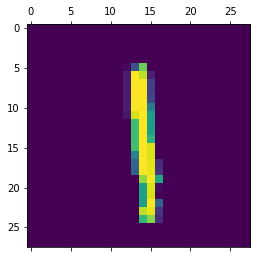

In [46]:
plt.matshow(X_train[8])

In [47]:
y_train[0]

5

In [48]:
y_train[8]

1

In [49]:
y_train[9]

4

In [50]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [51]:
model =keras.Sequential([
    keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4747 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9247


In [52]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9260


[0.2662777602672577, 0.9259999990463257]

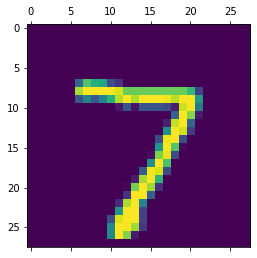

In [53]:
plt.matshow(X_test[0])

In [58]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.68712342e-02, 5.40345070e-07, 1.10446125e-01, 9.67473328e-01,
       2.32860446e-03, 1.07011646e-01, 2.64383812e-06, 9.99756336e-01,
       8.85837078e-02, 7.03492224e-01], dtype=float32)

In [59]:
np.argmax(y_predicted[0])

7

In [64]:
y_predicted[:5]

array([[2.68712342e-02, 5.40345070e-07, 1.10446125e-01, 9.67473328e-01,
        2.32860446e-03, 1.07011646e-01, 2.64383812e-06, 9.99756336e-01,
        8.85837078e-02, 7.03492224e-01],
       [3.66341054e-01, 6.03652000e-03, 9.99176741e-01, 4.28434372e-01,
        3.11386555e-10, 8.40457380e-01, 8.66987228e-01, 8.26502658e-13,
        1.31313533e-01, 1.95998107e-09],
       [4.08440828e-04, 9.94819164e-01, 7.03983665e-01, 3.71762693e-01,
        3.04352939e-02, 1.04124010e-01, 1.72615379e-01, 1.58811092e-01,
        3.89913082e-01, 4.76443470e-02],
       [9.99526978e-01, 2.97528935e-08, 1.29530787e-01, 5.34898043e-03,
        3.34147298e-05, 9.28910971e-02, 9.00875032e-02, 1.33855641e-02,
        2.34232545e-02, 1.88947618e-02],
       [4.02067900e-02, 4.64686273e-05, 1.75765753e-01, 4.62743640e-03,
        9.84018922e-01, 1.14774406e-02, 1.47095114e-01, 1.98958993e-01,
        2.58776635e-01, 6.82975352e-01]], dtype=float32)

In [66]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [61]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [70]:
cn = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels )
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,   10,  929,   16,    7,    3,   11,   10,   37,    4],
       [   3,    0,   20,  929,    0,   22,    2,   10,   16,    8],
       [   2,    1,    6,    2,  908,    0,    9,    4,    9,   41],
       [  11,    3,    5,   32,    7,  778,   13,    6,   30,    7],
       [  13,    3,    7,    1,    7,   11,  912,    2,    2,    0],
       [   1,    7,   26,    7,    5,    0,    0,  946,    2,   34],
       [   7,   11,    5,   28,    9,   29,    9,   10,  858,    8],
       [  11,    7,    1,   12,   22,    7,    0,   23,    5,  921]])>

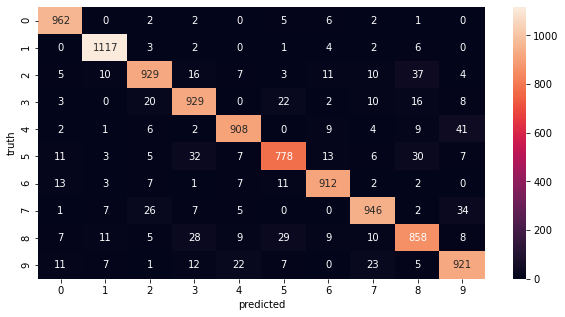

In [75]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cn , annot = True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [76]:
# adding hidden layer to improve the performance
model =keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9837


In [77]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9761


[0.07766546308994293, 0.9761000275611877]

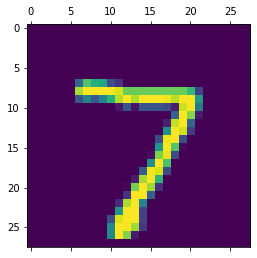

In [79]:
plt.matshow(X_test[0])

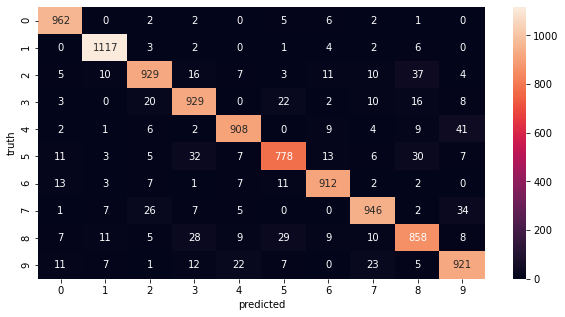

In [92]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cn , annot = True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [93]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),

        keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0667 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9838
